# Homework 3

Problem 1 is to be done as a group. Other problems are individual, though you can talk to others.

## Problem 1 

* Select a project based on chemical reactors, or reactor networks.
* Discuss the project with the instructor and group members.
* Ideas include 
    * Learning and extending existing cantera reactors.
    * Modeling a flame or combustor using a reactor network.
    * Investigating a kinetic process, such as ignition delay versus temperature, pressure, fuel, stoichiometry.
    * Compute a PSR S-Curve. Apply an unsteady periodic mixing rate and examine the effect on flame extinction and ignition.

## Problem 2

The 1-D species transport equation may be written as 
$$\rho\frac{\partial y_i}{\partial t} + \rho\vec{v}\frac{\partial y_i}{\partial x} - \frac{\partial}{\partial x}\left(\rho D\frac{\partial y_i}{\partial x}\right)= \dot{m_i}'''.$$
The 1-D mixture fraction transport equation is
$$\rho\frac{\partial \xi}{\partial t} + \rho\vec{v}\frac{\partial \xi}{\partial x} - \frac{\partial}{\partial x}\left(\rho D\frac{\partial \xi}{\partial x}\right)= 0.$$
In these equations we have assumed all species diffusivities are equal, and that these equal the mixture fraction diffusivity.

Use the species equation, along with the mixture fraction equation to derive the laminar flamelet equation given by
<font color='blue'>
$$\frac{\partial y_i}{\partial t} = \frac{\chi}{2}\frac{\partial^2y_i}{\xi^2} + \frac{\dot{m}_i'''}{\rho},$$
</font>
where
<font color='blue'>
$$\chi = 2D\left(\frac{\partial\xi}{\partial x}\right)^2.$$
</font>

#### Step 1
* We need to change coordinates from $x$ to $\xi$. 
* Write $y(t,x) = y(t,\xi(t,x))$.
* Then form the total derivative $dy$ of both sides using the definition of a derivative $df$ of a function $f(t,x)$.
* Use this to get the following transformations:
\begin{align}
\left(\frac{\partial}{\partial x}\right)_t &= \left(\frac{\partial\xi}{\partial x}\right)_t \left(\frac{\partial}{\partial \xi}\right)_t, \\
\left(\frac{\partial}{\partial t}\right)_x &= \left(\frac{\partial}{\partial t}\right)_\xi + \left(\frac{\partial\xi}{\partial t}\right)_x \left(\frac{\partial}{\partial \xi}\right)_t. \\
\end{align}
* Note that partials with respect to $x$ and $\xi$ are at constant $t$. We also have a partial with respect to $t$ at constant $x$ and at constant $\xi$. 
* The following shorthand notation is sometimes cconvenient, (so that we would write $(\partial\xi/\partial x)_t$ as $\partial_x\xi$):
\begin{align}
\left(\frac{\partial}{\partial x}\right)_t \equiv \partial_x,\\
\left(\frac{\partial}{\partial \xi}\right)_t \equiv \partial_\xi,\\
\left(\frac{\partial}{\partial t}\right)_x \equiv \partial_t,\\
\left(\frac{\partial}{\partial t}\right)_\xi \equiv \partial_\tau.
\end{align}
(Note the $\tau$ (tau) rather than $t$ in the last expression to distinguish this at constant $\xi$ not constant $x$. In other places, the variable held constant is clear.)

#### Step 2
* Apply these transformations to the species equation.
* Add and subtract $(\partial_\xi y)\partial_x(\rho D\partial_x\xi)$, then use the mixture fraction equation to cancel some of the terms. The result will have four terms. Transform any remaining space derivatives to mixture fraction derivatives, ignoring terms like $(\partial_x\xi)$, which are part of the transform. The accumulation and source terms are present in the final flamelet equation. The other two terms can be combined to give the mixing term of the flamelet equation. Use the product rule of differentiation: $d(ab) = adb + bda \rightarrow adb = d(ab)-bda$. An equation like this will substitute one of the terms. The $d(ab)$ portion will cancel, and the result is rearranged to the flamelet equation.


## Problem 3

A simplified version of the temperature flamelet equation is given by 
$$\frac{\partial T}{\partial t} = \frac{\chi}{2}\frac{\partial^2T}{\partial\xi^2} + S(\xi).$$

Here, $S$ is a reactive source term. The left boundary $\xi=0$ corresponds to pure air, and the right boundary $\xi=1$ corresponds to pure fuel. The source term is really also a function of composition requiring the solution of all of the species flamelet equations simultaneously. That was previously done and the source term computed on a grid of $\xi$ points. 

The Temperature flamelet equation give above is solved simply below starting from a given initial profile. This is solved from $t=0$ to $t=0.001$.

This is based on a homework problem from the 541 class. 

**Read the solution below and understand it. State if you did this.**


In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm
from mpl_toolkits.mplot3d.axes3d import Axes3D
from scipy.integrate import odeint
from scipy import interpolate

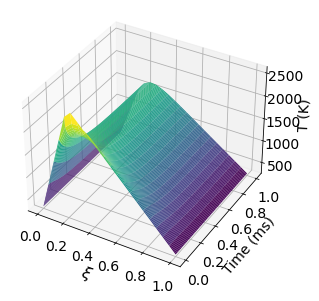

In [4]:
N    = 22                   # CHANGEME: total Grid pts w/ boundaries
chi0 = 2500.0               # chi scale: chi = cho*g(f)
Ni   = N-2                  # interior points
Tbc  = 298.15               # Boundary temperature

fa   = np.linspace(0,1,N)                  # all grid points f
f    = fa[1:-1]                            # interior f points
df   = f[1] - f[0]                         # grid spacing
chia = chi0*(1.0-(2.0*fa-1.0)**2.0)**2.0   # chi profile
chi  = chia[1:-1]                          # interior chi points

#--------------------- Set initial conditions and T source term

ξ = np.linspace(0,1,N)

T0 = np.array([Tbc, 837, 1377, 1917, 2457, 2590, 2447, 2303,
               2160, 2017, 1874, 1730, 1587, 1444, 1301, 1157,
               1014, 871, 727, 584, 441, Tbc])

S = np.array([0.0, 510.3, 1269297, 18207356, 30622770, 23825333,
              14987151, 8796653, 4931526, 2608687, 1273323, 558386,
              213038, 67832, 17015, 3090, 356, 21, 0.44, 0.0016, 0, 0])

    
#------------------------ define the rhs rate function 

def rhsf(T,t) :
    '''
    T includes all points including the boundaries (but boundary rates = 0)
    '''
    
    rate = np.zeros(N)  # rate[0]=rate[-1]=0; rest set below
    
    i = np.arange(1,N-1)  
    rate[i] = chi/2/df/df*(T[i-1] - 2*T[i] + T[i+1]) + S[i]
    
    return rate

#---------------------- Solve

t  = np.linspace(0, 0.001, 100)

T = odeint(rhsf, T0, t)

#----------------------- Plot

def make_plot(x, t, T):

    xx,tt = np.meshgrid(x,t)
    
    plt.rc("font", size=14)   
    fig = plt.figure(figsize=(8,5))
    ax  = fig.add_subplot(1,1,1, projection='3d')
    p   = ax.plot_surface(xx, tt*1000, T, rstride=1, cstride=1, cmap=cm.viridis, linewidth=0.0)
    ax.xaxis._axinfo['label']['space_factor'] = 2
    ax.yaxis._axinfo['label']['space_factor'] = 2
    ax.zaxis._axinfo['label']['space_factor'] = 1.8
    ax.set_xlabel(r'$\xi$', size=16)
    ax.set_ylabel('Time (ms)')
    ax.set_zlabel('T (K)', rotation=180)
    ax.view_init(35,300)
    
make_plot(fa, t, T)

## Problem 4

Read the [premix code manual](https://ignite.byu.edu/che641/lectures/premix_chemkin.pdf) sections 1-3. Pay special attention to the boundary condition treatment.

List a few things you learned.